# **Lab 3 - Sampling (Part 2)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Discrete Inversion Method
Last time, we discussed the Inverse Transform Method for continuous random variables whose CDF, $F$, was invertible over the support of the PDF, $f$. Now, we wish to generalize this idea to discrete random variables. To this end, we consider the following algorithm.</br></br>

__________________________

**Algorithm 1 (Discrete Inversion Method)**

Let $p_1,\dots,p_n\in[0,1]$ be such that $\sum_{i=1}^{n}p_i=1.$ We want to sample $N$ i.i.d. realizations of a discrete random variable $X$ attaining values $1,\dots,n$ with probabilities

$$\mathbb{P}(X=i)=p_i.$$

To this end, let $U\sim\mathcal{U}([0,1])$. We set

$$X=i\iff F_{i-1}< U \le F_{i}$$

where $F_i=\sum_{j=1}^{i}p_i$ are the discrete values attained by the desired CDF. Here, $F_0=0$ by convention.
_________________________

<mark>**Exercise 1**</mark></br>
- Let $F_X$ denote the CDF of the random variable $X$ in Algorithm 1. Show that
$$F_{X}(i)=F_i,$$
and conclude that $X$ has the desired distribution.

- Implement algorithm 1 by writing a function called $\textsf{DIMsampler}$ that, given a vector $\mathbf{p}=[p_1,\dots,p_n]$ and a sample size $N$, outputs a random sample of size $N$.

In [2]:
def DIMsampler(p, N):
  samples = np.random.rand(N)
  samples = [np.where(np.cumsum(p) > samples[i])[0][0].item() for i in range(N)]

  return samples


results = DIMsampler([0.90, 0.05, 0.05], 1000)

(array([913.,   0.,   0.,   0.,   0.,  37.,   0.,   0.,   0.,  50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

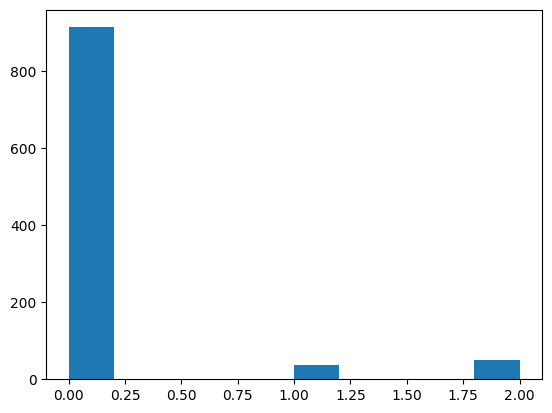

In [3]:
plt.hist(results)

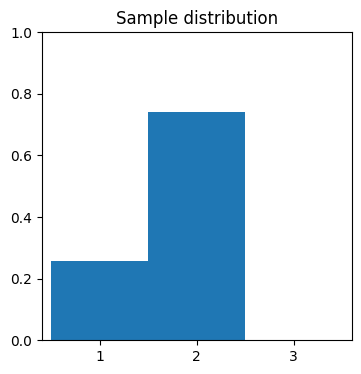

In [4]:
## Test to see if the implementation is correct

p = np.array([0.6, 0.1, 0.3])
N = 1000
X = DIMsampler(p, N)
plt.figure(figsize = (4, 4))
plt.hist(X, density = True, bins = [0.5, 1.5, 2.5, 3.5])
plt.axis([0.4, 3.6, 0, 1])
plt.title("Sample distribution")
plt.xticks([1, 2, 3])
None

**Remark**

With this trick, we can basically sample from any categorical variable! If $Y$ is categorical with $n$ levels, $l_1,\dots,l_n$, each with probability $p_1,\dots,p_n$, we can sample from $Y$ by setting $Y=l_{X}$, where $X$ is the discrete r.v. satisfying $\mathbb{P}(X=i)=p_i$.
</br>
</br>
For instance, the code below shows how we can leverage population counts to sample a random dataset listing the province of origin for 15 people randomly selected from the Lombardy territory.

In [5]:
np.random.seed(2)
population_counts = {'Milano':3252041,
                     'Bergamo':1113167 ,
                     'Brescia':1264730,
                     'Como':599000,
                     'Cremona':354093,
                     'Lecco':333821,
                     'Lodi':229951,
                     'Mantova':407187,
                     'Monza':878012,
                     'Pavia':540383,
                     'Sondrio':179165,
                     'Varese':880939}

provinces = list(population_counts.keys())
tot = sum([population_counts[province] for province in provinces])

p = np.array([population_counts[province]/tot  for province in provinces])
N = 15

X = DIMsampler(p, N)
sample = np.array(provinces)[X-1]

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [6]:
list(sample)

NameError: name 'sample' is not defined

## Sampling from a Normal distribution

The Normal distribution is continuous and its CDF, $F$, is strictly monotone over the whole real line.\
This is true because its first derivative, $f(x) > 0$ $\forall x\in \mathbb{R}$.\
However, we do not have an explicit formula for $F$, which makes it hard to apply the Inverse Transform Method. One solution is to rely on the *Box-Muller transformation*, which is based on the following Lemma.

**Lemma (Box-Muller transformation)**
*Let $X$ and $Y$ be two independent standard Gaussian random variables, $X,Y\sim\mathcal{N}(0,1)$. Let $R$ and $\Theta$ be the polar coordinates of the point $(X,Y)$ in the plane. Then $R$ and $\Theta$ are independent. Furthermore,
</br></br>
$$R^{2}\sim Exp(1/2)\quad\text{and}\quad\Theta\sim\mathcal{U}([0, 2\pi]).$$
</br></br>
Equivalently, if $U_1, U_2\sim\mathcal{U}([0,1])$, then $\tilde{X}=\sqrt{-2\log U_1}\cos(2\pi U_2)$ and $\tilde{Y}=\sqrt{-2\log U_1}\sin(2\pi U_2)$ are independent standard Gaussians.*

<mark>**Exercise 2**</mark></br>
- Leveraging the Box-Muller transformation, write a function called $\textsf{randnormal}$ that, given $\mu$, $\sigma$ and an (even) sample size $N$ draws an i.i.d. random sample from $X\sim\mathcal{N}(\mu,\sigma^2)$.

- Let $\mu=1, \sigma = 2$. Draw 10'000 samples and compare the results with the ground truth (histogram vs pdf).

- Compare your sampling with the one produced by the function $\textsf{numpy.random.randn}$ (up to shifting and dilating) using the 2-sample Kolmogorov-Smirnov test.

In [7]:
def randnormal(mu, sigma, N):
  u1 = np.random.rand(N//2)
  u2 = np.random.rand(N//2)

  X = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
  Y = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

  X_hat = mu + sigma*X
  Y_hat = mu + sigma*Y
  return np.concat([X_hat, Y_hat])

(array([  11.,   94.,  497., 1587., 2679., 2856., 1613.,  538.,  113.,
          12.]),
 array([-6.67594323, -5.14402867, -3.6121141 , -2.08019954, -0.54828498,
         0.98362958,  2.51554414,  4.0474587 ,  5.57937326,  7.11128782,
         8.64320238]),
 <BarContainer object of 10 artists>)

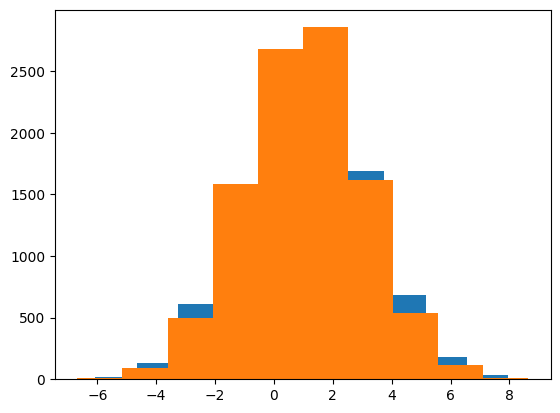

In [8]:
# Simulated data vs ground truth density
mu, sigma = 1, 2
N = 10000

simulated = randnormal(mu, sigma, N)
gd = np.random.normal(mu, sigma, N)

plt.hist(simulated)
plt.hist(gd)

In [9]:
from scipy.stats import kstest

empirical_cdf = lambda x: ecdf(simulated).cdf.evaluate(x)
gd_cdf = lambda x: ecdf(gd).cdf.evaluate(x)

kstest(simulated, gd)

KstestResult(statistic=np.float64(0.0123), pvalue=np.float64(0.43585275359069964), statistic_location=np.float64(0.0794350677057245), statistic_sign=np.int8(-1))

In [10]:
def twod_normal(mu, sigma, N):
    print(np.shape(mu))
    A = np.linalg.cholesky(sigma)
    stand_norm = np.stack([A@randnormal(0, 1, np.shape(mu)[0]) for _ in range(N)], axis=0)
    stand_norm += mu

    return stand_norm[:, 0], stand_norm[:, 1]

(2,)


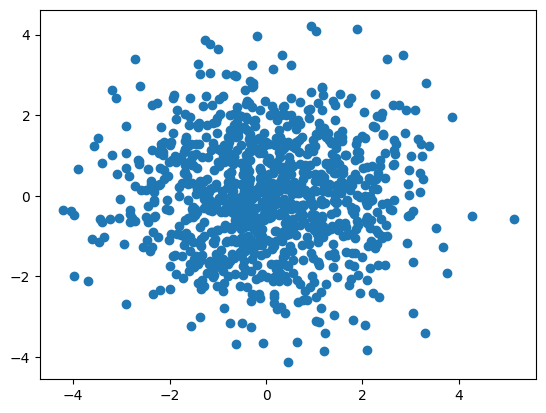

In [11]:
data = twod_normal([0, 0], np.array([[2, 0], [0, 2]]), 1000)
x = data[0]
y = data[1]

plt.scatter(x, y)

## Acceptance-Rejection method

All the methods we discussed so far are only applicable to scalar random variables and are not easily generalized to higher dimensions. Furthermore, they require knowing the desired distribution with absolute precision. This is not a problem for discrete random variables, but it constitutes a major limitation for *continuous* random variables (i.e., those admitting a density).

The acceptance-rejection method is a simple approach that overcomes some of these difficulties in the sense that:

- it can be used for both scalar and multi-dimensional problems
- it requires knowing the desired distribution up to a normalizing factor

The idea is the following. In order to sample from a distribution with density $f$, we first introduce a *proposal distribution*, $g$, from which we are able to sample easily (e.g. via Inverse Transform). The proposal should be constructed such that

$$f(x)\le Cg(x)\quad\forall x\in\mathbb{R}$$

for some $C>0$. Then, one can sample a realization of $X\sim f$ using the following algorithm.</br></br></br>

__________________________

**Algorithm 2 (Acceptance-Rejection)**

1. Sample some $x\in\mathbb{R}$ according to $g$.
2. Sample a random $u\in[0,1]$ according to the uniform distribution $\mathcal{U}([0,1])$.
3. If $u\cdot Cg(x)\le f(x)$, then set $x$ as the value sampled for $X$. If not, repeat from Step 1.
_________________________

</br></br>
It can be shown that the constant $C$ controls the probability of rejection (i.e., that one needs to repeat steps 1-3 in Algorithm 2). Specifically, the probability of rejection equals $1-1/C$. Thus, smaller values of $C$ are preferable. In this sense, a good choice can be</br></br>

$$C=\sup_{x:f(x)>0}\;\frac{f(x)}{g(x)}.$$
</br>

<mark>**Exercise 3**</mark></br>
- Implement Algorithm 2 by defining a function called $\textsf{acceptance\_rejection\_sampling}$, that, given a sample size $N$, a target distribution $f$, a proposal distribution $g$, a constant $C$ and proposal sampler $G$, uses the acceptance-rejection method to sample $N$ i.i.d. realizations of some $X\sim f$. Let your function return both the sampled values as well as a counter of the rejected ones.

- Test the approach for $f(x)=6x(1-x)\mathbf{1}_{[0,1]}(x),$ by letting either $g(x)=\mathbf{1}_{[0,1]}(x)$ or $g(x)=\frac{\pi}{2}\sin(\pi x)\mathbf{1}_{[0,1]}(x)$. Choose a suitable $C$ for the two cases and discuss which of the two proposals is more efficient.
</br></br>

*NB*: the sampler $S$ should be a callable that, when called, samples a single realization from some $\tilde{X}\sim g$.

For instance, if $g=\mathbf{1}_{[0,1]}$, then $\tilde{X}\sim\mathcal{U}([0,1])$ and $S=\textsf{numpy.random.rand}$.

</br></br>

*NB*: to sample from $g(x)=\frac{\pi}{2}\sin(\pi x)\mathbf{1}_{[0,1]}(x)$ you can use the Inverse Transform Method.

In [12]:
def acceptance_rejection_sampling(N, f, g, C, G):
  samples = np.zeros(N)
  for i in range(N):
    flag = False
    while (not flag):
      x = G()
      u = np.random.rand()
      if (u*C*g(x) <= f(x)):
        flag = True
        samples[i] = x
  
  return samples

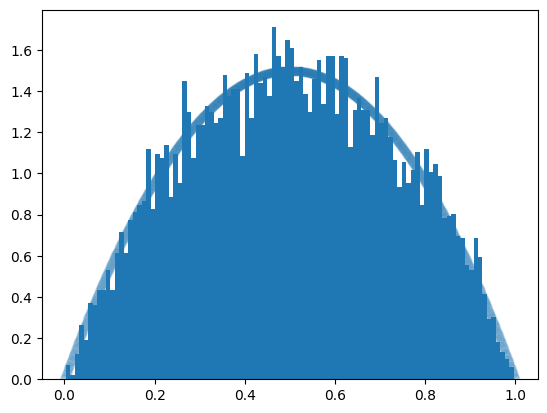

In [13]:
ind01 = lambda x: (x>=0)*(x<=1) + 0.0 # Auxiliary map implementing the indicator function
f = lambda x: 6*x*(1-x)*ind01(x)

xrange = np.linspace(0, 1, 1000)

# Test with uniform proposal
samples = acceptance_rejection_sampling(10000, f, ind01, 2, np.random.rand)
plt.hist(samples, density=True, bins=100)
plt.scatter(xrange, f(xrange), alpha=0.1)

In [21]:
# Sampling from sinusoidal distribution
g = lambda x: np.pi/2 * np.sin(np.pi * x)

def sinusoidal_sampling():
    u = np.random.rand()
    x = np.arccos(1-2*u)/np.pi
    return x

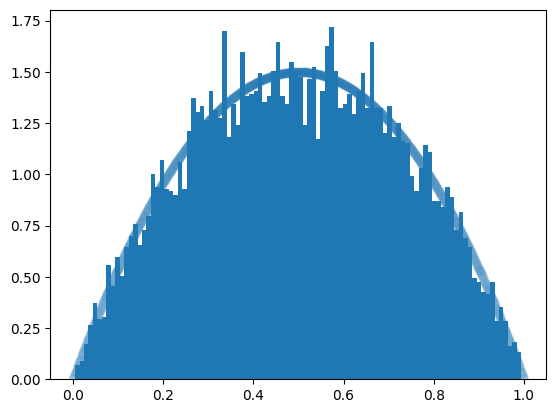

In [24]:
# Test with sinusoidal proposal
samples = acceptance_rejection_sampling(10000, f, g, 1.5, sinusoidal_sampling)
plt.hist(samples, density=True, bins=100)
plt.scatter(xrange, f(xrange), alpha=0.1)